#### 시계열 분석을 위한 기본학습

##### 기본용어

- 추세(Trend) : 시간에 따라 감소/증가하는 성향
- 계절성(Seasonality) : 계절에 따라 패턴을 가지는 성행
- 순환성(Cyclical) : 특정상황에서 발생하는 임시적인 성향(추세)
- 불규칙성(Irregular) : 지진, 홍수, 파업, 코로나, 같은 특수한 요인으로 발생하는 불규칙 패턴

##### 시계열 데이터 전처리방법

In [1]:
import pandas as pd
import numpy as np

In [2]:
# datetime 변환
df = pd.DataFrame({'date' : ['2019-01-03', '2021-11-24', '2023-07-11'], 'name' : ['JH', 'YS', 'OB']})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [7]:
df.astype({'date': 'datetime64[ms]'})

,date,name
0,2019-01-03,JH
1,2021-11-24,YS
2,2023-07-11,OB


In [5]:
# data 컬럼 datetime 형변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 180.0+ bytes


In [9]:
df.astype({'date':'datetime64[ns]'})

,date,name
0,2019-01-03,JH
1,2021-11-24,YS
2,2023-07-11,OB


In [14]:
# 날짜를 인덱스로 변경
df.set_index(keys=['date'], inplace=True)
df

,index,name
date,,
2019-01-03,0,JH
2021-11-24,1,YS
2023-07-11,2,OB


In [13]:
# 날짜를 인덱스에서 해제(인덱스 초기화)
df.reset_index(inplace=True)
df

,index,date,name
0,0,2019-01-03,JH
1,1,2021-11-24,YS
2,2,2023-07-11,OB


In [15]:
# 결측치 확인
# 결측치 값 python None, numpy nan
df =pd.DataFrame({'date' : ['2019-01-03', '2021-11-24', '2022-01-15', '2023-07-11'], 'x1' : [0.1, 2.0, np.nan, 1.2]})
df

,date,x1
0,2019-01-03,0.1
1,2021-11-24,2.0
2,2022-01-15,NaN
3,2023-07-11,1.2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4 non-null      object 
 1   x1      3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 196.0+ bytes


In [19]:
df = df.astype({'date':'datetime64[ns]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4 non-null      datetime64[ns]
 1   x1      3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 196.0 bytes


In [20]:
# 날짜를 인덱스
df.set_index(keys=['date'], inplace=True)
df

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,NaN
2023-07-11,1.2


In [22]:
# 결측치 확인
df.isnull().sum()

x1    1
dtype: int64

In [23]:
# 결측치 제거, inplace=True 변경 결정 ffill 이전값으로 대체
df.fillna(method='ffill')

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,2.0
2023-07-11,1.2


In [24]:
# ffill 이후값으로 대체
df.fillna(method='bfill')

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,1.2
2023-07-11,1.2


In [25]:
# 결측치 전후의 값의 평군으로 채우기
df.interpolate()

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,1.6
2023-07-11,1.2


In [26]:
# 결측치 제거 -> 데이터수 변경
df.dropna()

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2023-07-11,1.2


In [27]:
# 빈도 설정
df.index

DatetimeIndex(['2019-01-03', '2021-11-24', '2022-01-15', '2023-07-11'], dtype='datetime64[ns]', name='date', freq=None)

In [36]:
# 'Y' 매년 마지막날, 'M',  'D', 'W', 'SM', 'CBM', 'MS', 'Q', 'QS', 'H', 'T', 'S', 'N'
df.asfreq(freq='D', method='bfill')

,x1
date,
2019-01-03,0.1
2019-01-04,2.0
2019-01-05,2.0
2019-01-06,2.0
2019-01-07,2.0
...,...
2023-07-07,1.2
2023-07-08,1.2
2023-07-09,1.2


In [39]:
# rolling - 빈도범위를 다시 묶을때 특정값이 사라지는 경우 방지
df = pd.DataFrame({'date' : ['2019-01-03','2020-09-04', '2021-11-24', '2022-01-15', '2023-07-11'], 'x1' : [5,4,3,2,7]})
df = df.astype({'date':'datetime64[ns]'})
df.set_index(keys=['date'], inplace=True)
df

,x1
date,
2019-01-03,5
2020-09-04,4
2021-11-24,3
2022-01-15,2
2023-07-11,7


In [41]:
# rolling(1) 현재자기값을 그대로 평균
df.rolling(1).mean()

,x1
date,
2019-01-03,5.0
2020-09-04,4.0
2021-11-24,3.0
2022-01-15,2.0
2023-07-11,7.0


In [42]:
# rolling(2) 현재값을 밑으로 말면서 자기값과 합쳐서 평균
df.rolling(2).mean()

,x1
date,
2019-01-03,NaN
2020-09-04,4.5
2021-11-24,3.5
2022-01-15,2.5
2023-07-11,4.5


In [45]:
# 이전값과 차이 계산 diff
y_diff = df.diff()
y_diff.columns = ['diff']

In [50]:
pd.concat([df, y_diff], axis=1)

,x1,diff
date,,
2019-01-03,5,NaN
2020-09-04,4,-1.0
2021-11-24,3,-1.0
2022-01-15,2,-1.0
2023-07-11,7,5.0


In [51]:
# 데이터 밀기
df.shift(-1)

,x1
date,
2019-01-03,4.0
2020-09-04,3.0
2021-11-24,2.0
2022-01-15,7.0
2023-07-11,NaN


In [52]:
# 원-핫 인코딩 one-hot encoding
df_row = pd.DataFrame({'color':['red','blue','green','blue','red']})

one_hot = pd.get_dummies(df_row['color'])

In [57]:
one_hot

,blue,green,red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


In [56]:
# True/False 대신 1/0 표시
df_row.pop('color').str.get_dummies()

,blue,green,red
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


##### Apple 주식 데이터 전처리

##### 주식관 련 라이브러리 설치
- FinanceDateReader 모듈 설치

```python
    !pip install finance-DataReader
```

In [59]:
!pip install finance-DataReader

                                              0.0/3.8 MB ? eta -:--:--
     -------------------                      1.8/3.8 MB 39.0 MB/s eta 0:00:01
     ---------------------------------------  3.8/3.8 MB 48.2 MB/s eta 0:00:01
     ---------------------------------------- 3.8/3.8 MB 34.2 MB/s eta 0:00:00


In [60]:
import FinanceDataReader as fdr # 주식라이브러리 추가

import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [72]:
# 2022년 애플 주식 데이터 로드
# 미국주식은 주식코드, 우리나라 코드번호
df = fdr.DataReader('AAPL', '2022')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434296,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144272,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100
...,...,...,...,...,...,...
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300


In [64]:
df_krx = fdr.StockListing('KRX')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70700,1,1200,1.73,70200,71200,70100,6176881,436390259500,422063626285000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,553000,1,3000,0.55,553000,554000,547000,82505,45475879000,129402000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,111500,1,1200,1.09,111500,112700,111200,1094991,122633844000,81172263697500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,727000,1,19000,2.68,714000,734000,713000,36239,26315431000,51743498000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,58400,1,700,1.21,58000,58800,58000,214701,12530572500,48056583280000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,004565,KR7004561007,현대비앤지스틸우,KOSPI,,15910,1,6150,63.01,13500,19200,13500,63443,1064501430,1747745320,109852,STK
2729,322190,KR7322190000,베른,KONEX,일반기업부,178,1,20,12.66,178,178,178,20,3560,1588685066,8925197,KNX
2730,001745,KR7001741008,SK네트웍스우,KOSPI,,12150,1,550,4.74,11820,13200,11820,20707,265316030,1380823200,113648,STK
2731,308700,KR7308700004,테크엔,KONEX,일반기업부,300,1,23,8.30,300,300,300,1,300,1200000000,4000000,KNX


In [73]:
df_nasdaq =fdr.StockListing('KRX')
df_nasdaq

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70800,1,1300,1.87,70200,71200,70100,6434462,454610400900,422660604540000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,556000,1,6000,1.09,553000,556000,547000,88625,48870296000,130104000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,111700,1,1400,1.27,111500,112700,111200,1123593,125823797300,81317864170500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,727000,1,19000,2.68,714000,734000,713000,36697,26648183000,51743498000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,58500,1,800,1.39,58000,58800,58000,222160,12966527400,48138871950000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,004565,KR7004561007,현대비앤지스틸우,KOSPI,,15910,1,6150,63.01,13500,19200,13500,63443,1064501430,1747745320,109852,STK
2729,322190,KR7322190000,베른,KONEX,일반기업부,178,1,20,12.66,178,178,178,20,3560,1588685066,8925197,KNX
2730,001745,KR7001741008,SK네트웍스우,KOSPI,,12150,1,550,4.74,11820,13200,11820,20707,265316030,1380823200,113648,STK
2731,308700,KR7308700004,테크엔,KONEX,일반기업부,300,1,23,8.30,300,300,300,1,300,1200000000,4000000,KNX


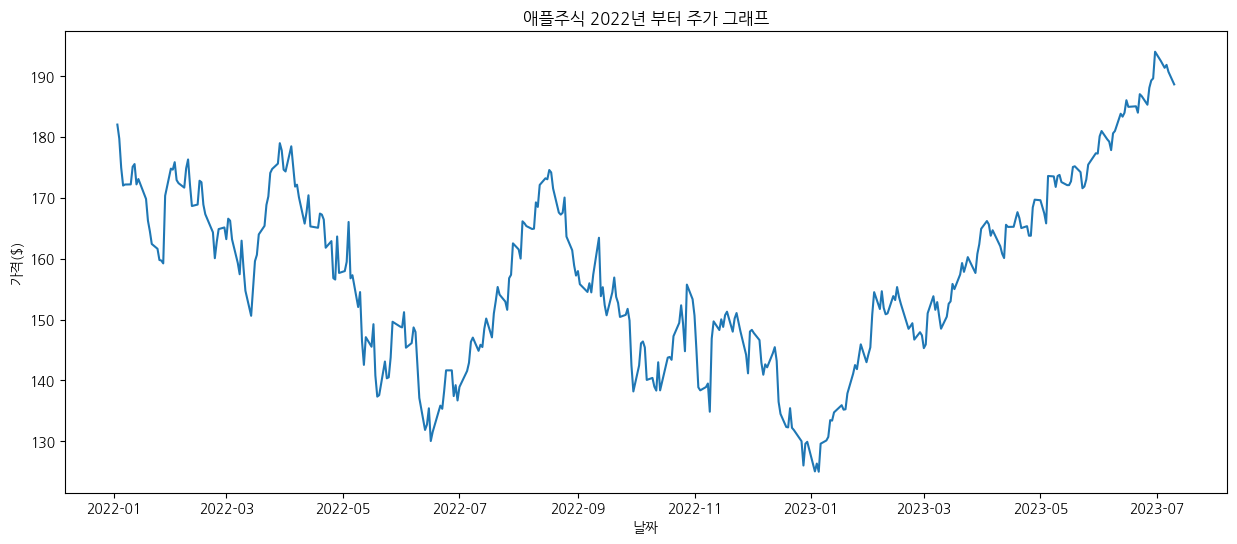

In [74]:
# 애플 주식 시각화
plt.figure(figsize=(15,6))
plt.title('애플주식 2022년 부터 주가 그래프')
plt.xlabel('날짜')
plt.ylabel('가격($)')

sns.lineplot(x=df.index, y=df['Close'])
plt.show()


In [78]:
df_samsung = fdr.DataReader('005930', '2008')
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2008-01-02,11180,11200,10840,10880,360944,-0.021583
2008-01-03,10760,11060,10640,10920,386930,0.003676
2008-01-04,10920,10960,10760,10780,359947,-0.012821
2008-01-07,10360,10480,10340,10380,795744,-0.037106
2008-01-08,10380,10480,10320,10320,495674,-0.005780
...,...,...,...,...,...,...
2023-07-05,73000,73300,71900,72000,12310610,-0.013699
2023-07-06,71900,72400,71500,71600,14777667,-0.005556
2023-07-07,71100,71400,69800,69900,17308877,-0.023743


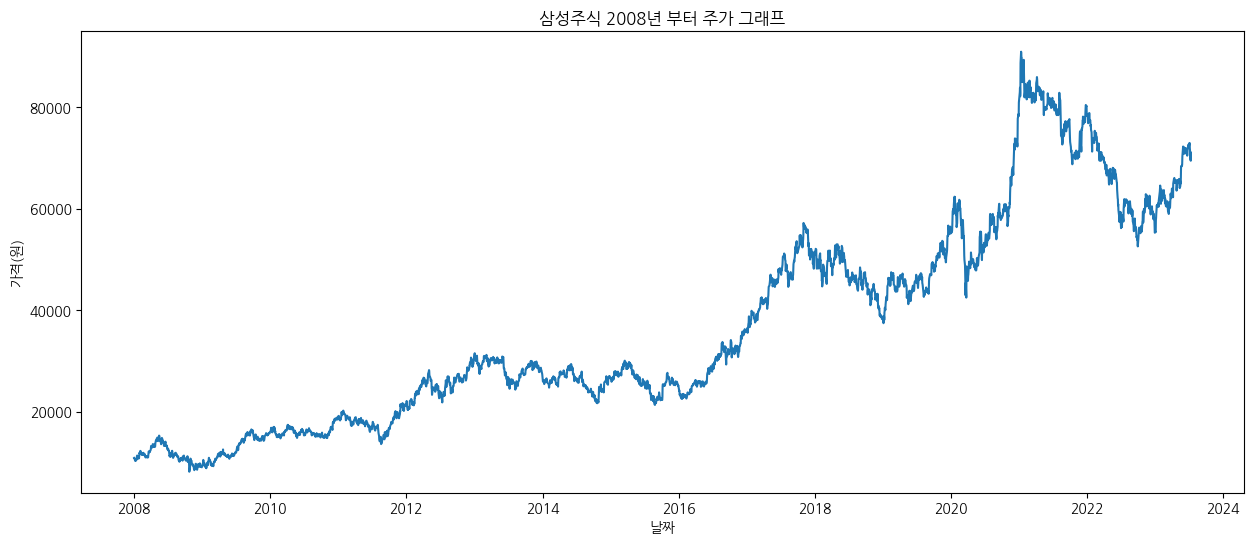

In [80]:
# 삼성 주식 시각화
plt.figure(figsize=(15,6))
plt.title('삼성주식 2008년 부터 주가 그래프')
plt.xlabel('날짜')
plt.ylabel('가격(원)')

sns.lineplot(x=df_samsung.index, y=df_samsung['Close'])
plt.show()